# Performing AdaBoost Classification without using SKLEARN's inbuilt class

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

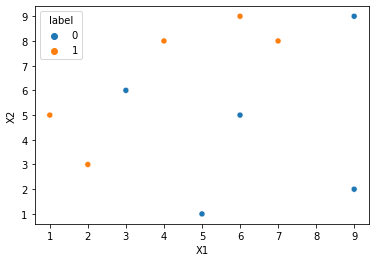

In [6]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.scatterplot(df['X1'] , df['X2'] , hue = df['label'])

## Step 1: Assign weights

In [7]:
df['weights'] = 1/(df.shape[0])

In [8]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [10]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

## Step 2: Train the 1st model

In [11]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

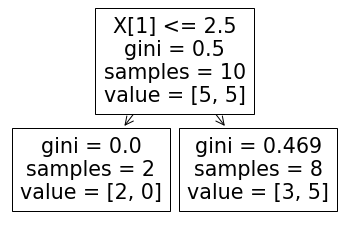

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

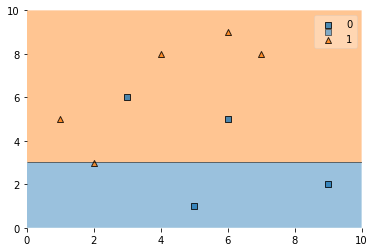

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=dt1)

In [16]:
df['y_pred'] = dt1.predict(X)

In [17]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


## Step 3: Calculate Performance(alpha)

In [116]:
def calculate_weight(error):
    return 0.5*np.log((1-(error+0.000001))/(error+0.000001))

In [22]:
error = 0.1+0.1+0.1 ## Model has made Three errors and all the weights were 0.1

alpha1 = calculate_weight(0.3)
print(alpha1)

0.42364893019360184


## Step 4: Update the weights

In [31]:
def update_weights(row, alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [34]:
df['updated_weights'] = df.apply(update_weights, axis=1)

In [35]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [36]:
df['normalized_weights'] = df['updated_weights']/(df['updated_weights'].sum())

In [37]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [38]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [39]:
df['cumsum_lower'] = df['cumsum_upper']-df['normalized_weights']

In [41]:
df[['X1', 'X2' , 'label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


## Second Decision Tree

In [48]:
def create_new_dataset(df):
    
    indices = []
    
    for i in range(df.shape[0]):
        a = np.random.random()
        for index , row in df.iterrows():
            if row['cumsum_lower']<a and a <row['cumsum_upper']:
                    indices.append(index)
    return indices

In [56]:
index_values = create_new_dataset(df)

In [57]:
index_values

[2, 3, 2, 8, 2, 6, 2, 0, 4, 7]

In [58]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [59]:
second_df

,X1,X2,label,weights
2,3,6,0,0.1
3,4,8,1,0.1
2,3,6,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
0,1,5,1,0.1
4,5,1,0,0.1
7,7,8,1,0.1


In [60]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [70]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [71]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]

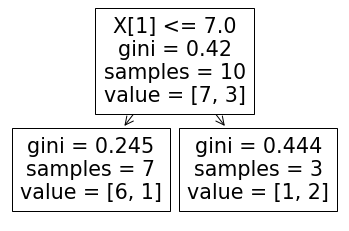

In [72]:
plot_tree(dt2)

In [73]:
second_df['y_pred'] = dt2.predict(X)

In [74]:
second_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
3,4,8,1,0.1,1
2,3,6,0,0.1,0
8,9,9,0,0.1,1
2,3,6,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
0,1,5,1,0.1,0
4,5,1,0,0.1,0
7,7,8,1,0.1,1


<AxesSubplot:>

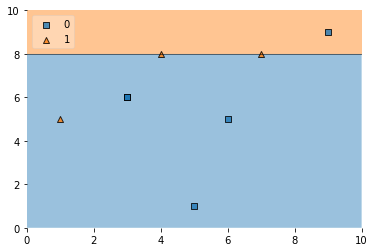

In [76]:
plot_decision_regions(X,y,dt2,legend=2)

In [78]:
error = 0.1+0.1 ## Model has made Two errors and all the weights were 0.1

alpha2 = calculate_weight(0.2)
print(alpha2)

0.6931471805599453


In [79]:
def update_weights(row, alpha=0.693):
    if row['label'] == row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [82]:
second_df['updated_weights'] = second_df.apply(update_weights, axis=1)

In [83]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
2,3,6,0,0.1,0,0.050007
3,4,8,1,0.1,1,0.050007
2,3,6,0,0.1,0,0.050007
8,9,9,0,0.1,1,0.199971
2,3,6,0,0.1,0,0.050007
6,6,5,0,0.1,0,0.050007
2,3,6,0,0.1,0,0.050007
0,1,5,1,0.1,0,0.199971
4,5,1,0,0.1,0,0.050007
7,7,8,1,0.1,1,0.050007


In [84]:
second_df['normalized_weights'] = second_df['updated_weights']/(second_df['updated_weights'].sum())

In [85]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
2,3,6,0,0.1,0,0.050007,0.062509
3,4,8,1,0.1,1,0.050007,0.062509
2,3,6,0,0.1,0,0.050007,0.062509
8,9,9,0,0.1,1,0.199971,0.249963
2,3,6,0,0.1,0,0.050007,0.062509
6,6,5,0,0.1,0,0.050007,0.062509
2,3,6,0,0.1,0,0.050007,0.062509
0,1,5,1,0.1,0,0.199971,0.249963
4,5,1,0,0.1,0,0.050007,0.062509
7,7,8,1,0.1,1,0.050007,0.062509


In [86]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper']-second_df['normalized_weights']

second_df[['X1', 'X2' , 'label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
2,3,6,0,0.1,0,0.050007,0.000000,0.062509
3,4,8,1,0.1,1,0.050007,0.062509,0.125018
2,3,6,0,0.1,0,0.050007,0.125018,0.187528
8,9,9,0,0.1,1,0.199971,0.187528,0.437491
2,3,6,0,0.1,0,0.050007,0.437491,0.500000
6,6,5,0,0.1,0,0.050007,0.500000,0.562509
2,3,6,0,0.1,0,0.050007,0.562509,0.625018
0,1,5,1,0.1,0,0.199971,0.625018,0.874982
4,5,1,0,0.1,0,0.050007,0.874982,0.937491
7,7,8,1,0.1,1,0.050007,0.937491,1.000000


## Third Decision Tree

In [107]:
index_values = create_new_dataset(second_df)
index_values

[7, 6, 0, 0, 2, 0, 4, 2, 6, 2]

In [108]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [109]:
third_df

,X1,X2,label,weights
0,1,5,1,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1


In [110]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [111]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [112]:
third_df['y_pred'] = dt3.predict(X)

In [113]:
third_df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
2,3,6,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0


<AxesSubplot:>

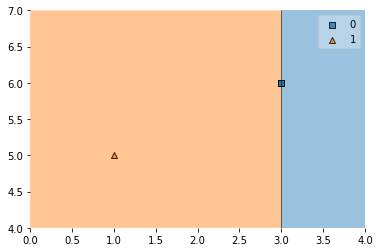

In [114]:
plot_decision_regions(X,y,dt3)

In [117]:
error = 0

In [118]:
alpha3 = calculate_weight(0)

In [119]:
print(alpha3)

6.907754778981887


# Prediction

## Prediction 1 

In [123]:
dt1.predict(np.array([1,5]).reshape(1,2))

array([1], dtype=int64)

In [124]:
dt2.predict(np.array([1,5]).reshape(1,2))

array([0], dtype=int64)

In [125]:
dt3.predict(np.array([1,5]).reshape(1,2))

array([1], dtype=int64)

In [127]:
prediction = alpha1*(1) + alpha2*(-1) + alpha3*(1)
print(prediction)

6.6382565286155435


In [128]:
Final_prediction = np.sign(prediction)
print(Final_prediction)

1.0


## Prediction 2

In [129]:
dt1.predict(np.array([9,2]).reshape(1,2))

array([0], dtype=int64)

In [130]:
dt2.predict(np.array([9,2]).reshape(1,2))

array([0], dtype=int64)

In [131]:
dt3.predict(np.array([9,2]).reshape(1,2))

array([0], dtype=int64)

In [132]:
prediction = alpha1*(-1) + alpha2*(-1) + alpha3*(-1)
print(prediction)

-8.024550889735433


In [133]:
Final_prediction = np.sign(prediction)
print(Final_prediction)

-1.0


# Using SKLEARN's Adaboost Classifier

In [2]:
df = pd.DataFrame()

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [3]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [4]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier()

X = df.iloc[:,0:2]
y = df.iloc[:,-1]

ada_boost.fit(X,y)
y_pred = ada_boost.predict(X)

In [5]:
df['y_pred'] = y_pred

In [6]:
df

,X1,X2,label,y_pred
0,1,5,1,1
1,2,3,1,1
2,3,6,0,0
3,4,8,1,1
4,5,1,0,0
5,6,9,1,1
6,6,5,0,0
7,7,8,1,1
8,9,9,0,0
9,9,2,0,0


E:\Installations\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

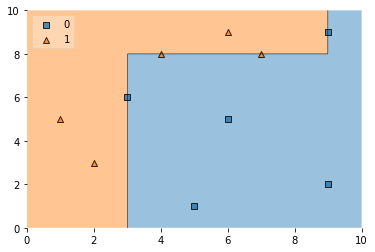

In [10]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,ada_boost, legend=2)